# CIFAR-10: Image Dataset
The CIFAR-10 dataset consists of 50000 32x32 colour images in 10 classes, which are *plane*, *car*, *bird*, *cat*, *deer*, *dog*, *frog*, *horse*, *ship*, *truck*.

In [1]:
# import os
# import pickle
# import numpy as np
# from PIL import Image
# import matplotlib.pyplot as plt
# from tqdm import tqdm

In [2]:
# from exercise_code.data import (
#     ImageFolderDataset,
#     RescaleTransform,
#     NormalizeTransform,
#     ComposeTransform,
#     compute_image_mean_and_std,
# )

In [3]:
# from exercise_code.tests import (
#     test_image_folder_dataset,
#     test_rescale_transform,
#     test_compute_image_mean_and_std,
#     test_len_dataset,
#     test_item_dataset,
#     test_transform_dataset,
#     save_pickle
# )

In [4]:
# import os
# import pickle
# import numpy as np
# from PIL import Image
# import matplotlib.pyplot as plt
# from tqdm import tqdm
# %load_ext autoreload
# %autoreload 2
# %matplotlib inline

In [5]:
# plt.rcParams['figure.figsize'] = (10.0, 8.0)
# plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'

1. Data Download

In [6]:
# # get current directory
# print(os.getcwd()) 
# # get absolute directory path
# print(os.path.abspath(os.getcwd()))
# # get parent directory
# print(os.path.dirname(os.path.abspath(os.getcwd())))

In [7]:
# i2dl_exercise_path = os.path.dirname(os.path.abspath(os.getcwd()))
# cifar_root = os.path.join(i2dl_exercise_path, "datasets", "cifar10")
# dataset = ImageFolderDataset(root=cifar_root, force_download = False, verbose = True)

2. Data Visualization

In [8]:
# def load_image_as_numpy(image_path):
#     return np.asrray(Image.open(image_path),dtype=float)

In [9]:
# classes = [
#     'plane', 'car', 'bird', 'cat', 'deer',
#     'dog', 'frog', 'horse', 'ship', 'truck',
# ]

In [10]:
# num_classes = len(classes)
# samples_per_class = 10

In [11]:
# for label, cls in enumerate(sorted(classes)):
#     for i in range(samples_per_class):
#         image_path = os.path.join(
#             cifar_root,
#             cls, #folder name = class name
#             str(i+1).zfill(4) + ".png" #0004.png
#         )
#         image = np.asarray(Image.open(image_path))
#         plt_idx = i * num_classes + label + 1 # calculate plot location in the grid
#         plt.subplot(samples_per_class, num_classes, plt_idx)
#         plt.imshow(image.astype('uint8')) #char=[0, 255]
#         plt.axis('off')
#         if i == 0:
#             plt.title(cls)
# plt.show()

# From here, using my own dataloader (./dataloader/)

In [12]:
import os
import pickle
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# rk_ImageFolderData class
- Access single files every time we access a dataset element by using get_item which are then loaded into the memory
- This is time consuming when we get an image from a local HDD
- To avoid this, we can store list of images and lists in a pickle and we can obtain lists by using Reader of pickle

- ImagedFolderDataset()
  - Given file path (.zip) to download_url


In [13]:
# get current directory
print(os.getcwd()) 
# get absolute directory path
print(os.path.abspath(os.getcwd()))
# get parent directory
print(os.path.dirname(os.path.abspath(os.getcwd())))

/home/ryotok/Documents/ML_DL/machine-learning-excercise
/home/ryotok/Documents/ML_DL/machine-learning-excercise
/home/ryotok/Documents/ML_DL


In [14]:
classes = [
    'plane', 'car', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck',
]

Found dataset folder. Skipped downloading. If you face issues, please re-download the dataset using
'--force_download=True'
50000
{'image': array([[[  3., 125., 233.],
        [  3., 130., 238.],
        [  4., 133., 241.],
        ...,
        [  2., 128., 237.],
        [  3., 124., 233.],
        [  3., 119., 227.]],

       [[  2., 130., 239.],
        [  1., 136., 243.],
        [  3., 139., 244.],
        ...,
        [  3., 134., 241.],
        [  4., 131., 238.],
        [  3., 127., 232.]],

       [[  4., 137., 244.],
        [  8., 140., 250.],
        [ 12., 145., 252.],
        ...,
        [  5., 140., 245.],
        [  4., 138., 243.],
        [  5., 135., 241.]],

       ...,

       [[ 52., 154., 252.],
        [ 53., 155., 255.],
        [ 55., 156., 254.],
        ...,
        [ 70., 158., 255.],
        [ 70., 158., 254.],
        [ 68., 156., 249.]],

       [[ 50., 151., 251.],
        [ 53., 154., 254.],
        [ 55., 156., 253.],
        ...,
        [ 70., 158

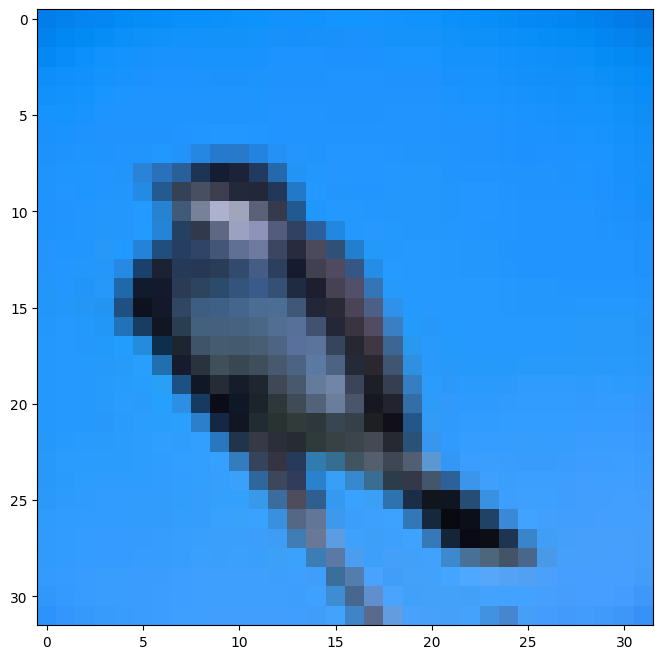

In [15]:
from dataloader.image_folder_dataset import rk_ImageFolderDataset

# path to archive
directory = os.path.dirname(os.path.abspath(os.getcwd()))
cifar_root = os.path.join(directory, "datasets", "cifar10")

# instance of ImageFolderDataset
dataset = rk_ImageFolderDataset(root = cifar_root, force_download = False, verbose = True)

print(dataset.__len__())
# image: image file path, label: class indicator
sample_dict_else = dataset[0]
print(sample_dict_else)
sample_image = sample_dict_else["image"]
sample_label = sample_dict_else["label"]
print(sample_image.shape)


plt.imshow(sample_image.astype('uint8'))

In [16]:
num_samples = 0
max_num_samples = 100

for i, sample in enumerate(tqdm(dataset, total = max_num_samples)):
    if i > max_num_samples:
        break
    num_samples += 1

print("Number of samples", num_samples)

101it [00:00, 5042.19it/s]             

Number of samples 101


In [17]:
print(os.path.dirname(os.getcwd()))

/home/ryotok/Documents/ML_DL


# Save image dataset into a pckl

In [18]:
dataset.damp_pckl(os.path.join(os.path.dirname(os.getcwd()),'datasets'),'cifar10.pckl')

# Restore the image dataset from pckl file

In [19]:
pckl_file_path = os.path.join(os.path.dirname(os.getcwd()), 'datasets', 'memory')

In [20]:
print(pckl_file_path)

/home/ryotok/Documents/ML_DL/datasets/memory


# rk_MemoryImageFolderDataset
- Restore instance of MemoryImageFolderDataset parameters which are stored in the pickle file (pckl_fname)

In [21]:
from dataloader.image_folder_dataset import rk_MemoryImageFolderDataset
dataset_root = os.path.join(os.path.dirname(os.getcwd()))

memory_dataset = rk_MemoryImageFolderDataset(
    root= pckl_file_path,
    pckl_fname = 'cifar10.pckl',
    verbose = True,
)

Found dataset folder. Skipped downloading. If you face issues, please re-download the dataset using
'--force_download=True'


In [22]:
memory_sample_dict = memory_dataset[0]
print(memory_sample_dict)

{'image': array([[[  3., 125., 233.],
        [  3., 130., 238.],
        [  4., 133., 241.],
        ...,
        [  2., 128., 237.],
        [  3., 124., 233.],
        [  3., 119., 227.]],

       [[  2., 130., 239.],
        [  1., 136., 243.],
        [  3., 139., 244.],
        ...,
        [  3., 134., 241.],
        [  4., 131., 238.],
        [  3., 127., 232.]],

       [[  4., 137., 244.],
        [  8., 140., 250.],
        [ 12., 145., 252.],
        ...,
        [  5., 140., 245.],
        [  4., 138., 243.],
        [  5., 135., 241.]],

       ...,

       [[ 52., 154., 252.],
        [ 53., 155., 255.],
        [ 55., 156., 254.],
        ...,
        [ 70., 158., 255.],
        [ 70., 158., 254.],
        [ 68., 156., 249.]],

       [[ 50., 151., 251.],
        [ 53., 154., 254.],
        [ 55., 156., 253.],
        ...,
        [ 70., 158., 255.],
        [ 68., 156., 254.],
        [ 64., 151., 250.]],

       [[ 45., 147., 252.],
        [ 50., 150., 253.],
      

(32, 32, 3)


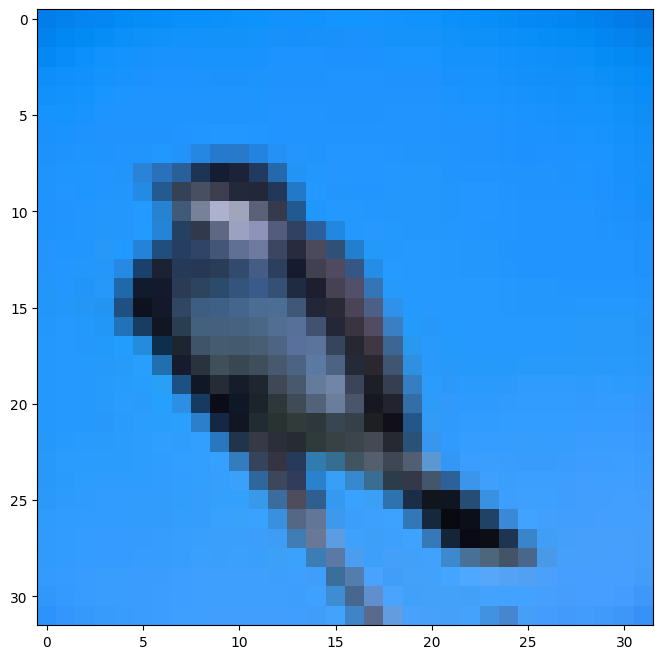

In [23]:
sample_image = memory_sample_dict["image"]
print(sample_image.shape)
plt.imshow(sample_image.astype('uint8'))

In [24]:
num_samples = 0
max_num_samples = 100

for i, sample in enumerate(tqdm(dataset, total=max_num_samples)):
    if i>=max_num_samples:
        break
    num_samples += 1

print("num_samples:",num_samples)

100%|██████████| 100/100 [00:00<00:00, 9704.54it/s]

num_samples: 100


In [25]:
DATASET = rk_MemoryImageFolderDataset

# Dataset Transforms and Image Processing
Before training machine learning models, we usually need to pre-process the given dataset. For image datasets, two commonly applied techniques are:

1. Normalization all images so that each value is either [-1, 1] or [0, 1]. By doing so the image are also converted to floating point number
   - When you want to visualize them, we need to map value to unsigned char 1byte range [0, 255] and convert it to uint8
2. Compute the mean over all images and subtract this mean from all images in the dataset. 

In the ImageFolderDataset class, we are going to transform the image into a certain form when we call __getitem__ with dataset[index]

# Rescaling and Rescale Transform

In [26]:
pckl_file_path = os.path.join(os.path.dirname(os.getcwd()), 'datasets', 'memory')
pckl_fname = 'cifar10.pckl'
dataset_for_rescale = DATASET(root=pckl_file_path, pckl_fname=pckl_fname, verbose = True)

Found dataset folder. Skipped downloading. If you face issues, please re-download the dataset using
'--force_download=True'


image index:  [37987]
label: 0


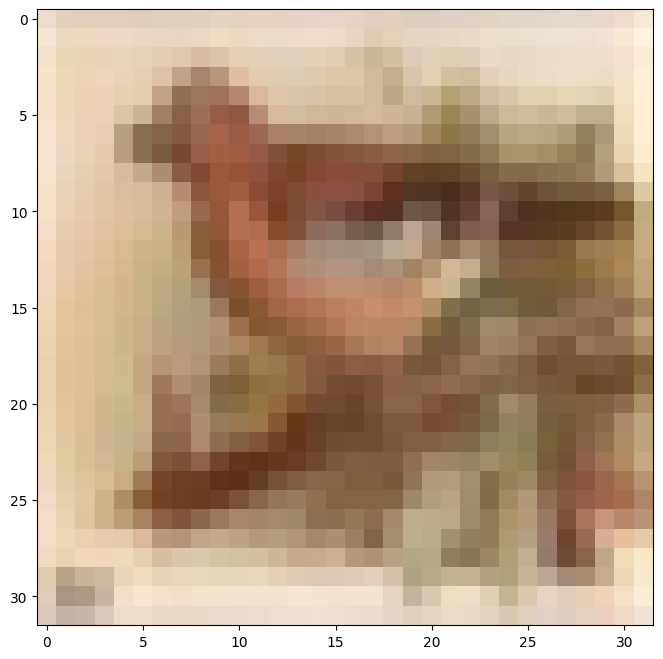

In [27]:
random_id = np.random.choice(len(dataset_for_rescale), 1)
print("image index: ", random_id)
sample = dataset_for_rescale[1] # sampling dict
sample_image = sample["image"] 
sample_label = sample["label"]
plt.imshow(sample_image.astype('uint8'))
print("label:", sample_label)

In [ ]:
from .dataloader.transforms import RescaleTransform

Normalized_dataset = rk_MemoryImageFolderDataset()